In [2]:
%matplotlib notebook
import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import datetime
import time

/Users/VyUng/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' 
         % y for y in years]
#I imported the data, using the three variables: 
#LST_DATE,LST_TIME and AIR_TEMPERATURE 
#(which corresponds to columns with indexes 3, 4 and 8. 
#I chose to use local standard time so that I can get better intuition 
#from the data. 
usecols = [3, 4, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

print data

[[  2.01012310e+07   1.60500000e+03  -6.40000000e+00]
 [  2.01012310e+07   1.61000000e+03  -6.50000000e+00]
 [  2.01012310e+07   1.61500000e+03  -6.50000000e+00]
 ..., 
 [  2.01612310e+07   1.55000000e+03   0.00000000e+00]
 [  2.01612310e+07   1.55500000e+03  -1.00000000e-01]
 [  2.01612310e+07   1.60000000e+03  -1.00000000e-01]]


In [4]:
#Here I converted time column into the form of "minutes of the day"
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)

In [5]:
#Here I converted day column into the form of "days of the year" 
days=[]
for d in data[:, 0]:
    days.append(datetime.datetime.strptime(str(d),'%Y%m%d.0').timetuple().tm_yday)
for i in range(len(days)):
    data[i,0]=days[i]

In [6]:
#Define valid, so that we can leave out invalid rows
valid = data[:, 2] > -1000
x1=data[valid,0]
x2=data[valid,1]


In [7]:
new_x = []
for i in range(len(x1)):
    this = x1[i]*1440 + x2[i]
    new_x.append(this)
new_x=np.asarray(new_x)

In [8]:
new_y = np.asarray(data[valid,2])

In [9]:
x_train=new_x[0:525887]
x_test=new_x[525887:630855]
y_train=new_y[0:525887]
y_test=new_y[525887:630855]

In [10]:
%config InlineBackend.figure_format = 'svg'
import GPy
import numpy as np


In [3]:
#from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel,RationalQuadratic

<IPython.core.display.Javascript object>


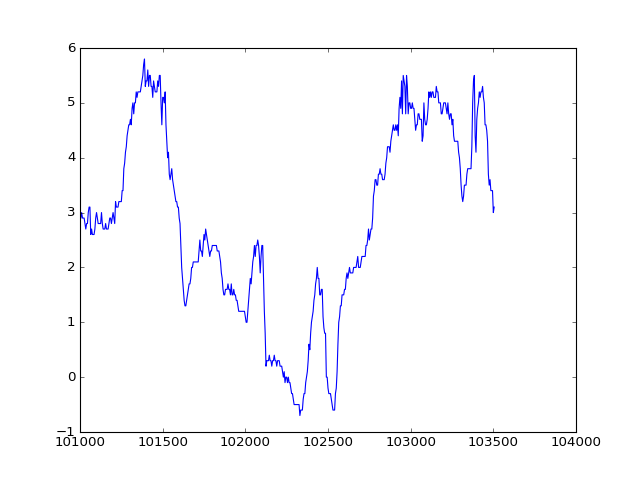

In [14]:
#Try on a fraction of the dataset 
sx1=x_train[20000:20500]
sy1=y_train[20000:20500]
plt.plot(sx1,sy1)

In [ ]:
#k1 = RBF(length_scale=100)  # long term smooth rising trend
#Z = np.hstack((np.linspace(2.5,4.,3),np.linspace(7,8.5,3)))[:,None]
start_time=time.time()
k = GPy.kern.RBF(1,lengthscale=10000)
k2 = GPy.kern.PeriodicExponential(input_dim=1,period=10) + GPy.kern.White(1)
m = GPy.models.SparseGPRegression(x_train.reshape(-1,1),y_train.reshape(-1,1),kernel=k2)
m.inducing_inputs.fix()
m.optimize('bfgs')
m.plot()
print m
end_time=time.time()
running_time=end_time-start_time
print ("Run time: %.2f" % running_time)

In [ ]:
from sklearn.metrics import mean_squared_error
y_predicted,sigma=m.predict(x_test.reshape(-1,1))
print("Mean squared error: %.2f" 
      % mean_squared_error(y_test.reshape(-1,1), y_predicted))


In [102]:
x1_test=x1[525887:630855]
x2_test=x2[525887:630855]

<IPython.core.display.Javascript object>


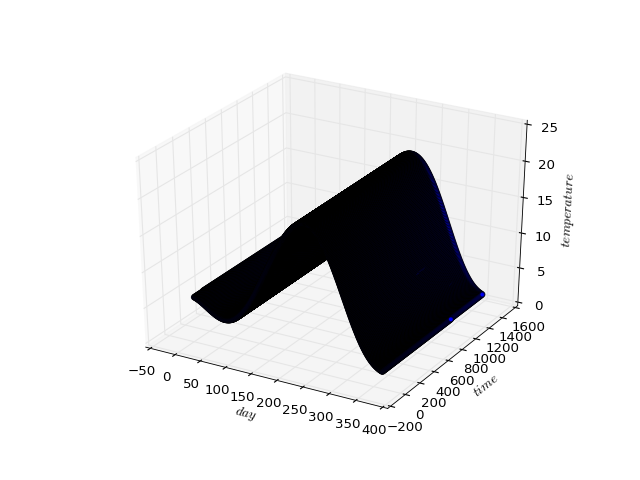

In [103]:
#Plotting the predictions in 3D:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
def plot_data(title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x1_test, x2_test, y_predicted) 
    ax.set_xlabel('$day$')
    ax.set_ylabel('$time$')
    ax.set_zlabel('$temperature$')
    if title is not None:
        plt.title(title)

    return ax


_ = plot_data()